# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

# 2. Loading Data

In [2]:
data_frame = pd.read_csv('creditcardmarketing_1.csv')

# 3. Data Prerocessing


## 3.1 Exploratory Data Analysis

In [3]:
data_frame.shape

(17999, 17)

In [4]:
data_frame.columns


Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'homeowner', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

#### Add column titles

In [5]:
data_frame.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer_type', 'income_level', 'bank_accounts_open', 'overdraft_protection', 'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size', 'homeowner', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

In [6]:
data_frame.shape

(17999, 17)

In [7]:
data_frame.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,homeowner,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [8]:
#Check the types of values
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17999 non-null  int64  
 1   offer_accepted        17999 non-null  object 
 2   reward                17999 non-null  object 
 3   mailer_type           17999 non-null  object 
 4   income_level          17999 non-null  object 
 5   bank_accounts_open    17999 non-null  int64  
 6   overdraft_protection  17999 non-null  object 
 7   credit_rating         17999 non-null  object 
 8   credit_cards_held     17999 non-null  int64  
 9   homes_owned           17999 non-null  int64  
 10  household_size        17999 non-null  int64  
 11  homeowner             17999 non-null  object 
 12  average_balance       17975 non-null  float64
 13  q1_balance            17975 non-null  float64
 14  q2_balance            17975 non-null  float64
 15  q3_balance         

In [9]:
#Check for null values
data_frame.isnull().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
homeowner                0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [10]:
#Check percentage of nulls
nulls = pd.DataFrame(data_frame.isna().sum()/len(data_frame))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
16,q4_balance,0.001333
15,q3_balance,0.001333
14,q2_balance,0.001333
13,q1_balance,0.001333
12,average_balance,0.001333
9,homes_owned,0.000000
11,homeowner,0.000000
10,household_size,0.000000
0,customer_number,0.000000
1,offer_accepted,0.000000


In [11]:
# Visualise nulls
data_frame[data_frame['average_balance'].isnull()]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,homeowner,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
322,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3069,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3107,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3788,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5082,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5676,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5688,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6931,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7786,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7863,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop null values
data_frame.dropna(axis=0, inplace=True)

In [13]:
# Check if null values have been dropped
data_frame.shape

(17975, 17)

In [14]:
data_frame.isnull().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
homeowner               0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [15]:
for column in data_frame:
    unique_values = np.unique(data_frame[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print(f"The number of values for feature {column} is: {nr_values} -- {unique_values}")
    else:
        print(f"The number of values for feature {column} is: {nr_values}")

The number of values for feature customer_number is: 17975
The number of values for feature offer_accepted is: 2 -- ['No' 'Yes']
The number of values for feature reward is: 3 -- ['Air Miles' 'Cash Back' 'Points']
The number of values for feature mailer_type is: 2 -- ['Letter' 'Postcard']
The number of values for feature income_level is: 3 -- ['High' 'Low' 'Medium']
The number of values for feature bank_accounts_open is: 3 -- [1 2 3]
The number of values for feature overdraft_protection is: 2 -- ['No' 'Yes']
The number of values for feature credit_rating is: 3 -- ['High' 'Low' 'Medium']
The number of values for feature credit_cards_held is: 4 -- [1 2 3 4]
The number of values for feature homes_owned is: 3 -- [1 2 3]
The number of values for feature household_size is: 8 -- [1 2 3 4 5 6 8 9]
The number of values for feature homeowner is: 2 -- ['No' 'Yes']
The number of values for feature average_balance is: 4728
The number of values for feature q1_balance is: 2158
The number of values for

In [16]:
# Check numericlas
numericals = data_frame.select_dtypes(np.number)
numericals.head()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,6,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0


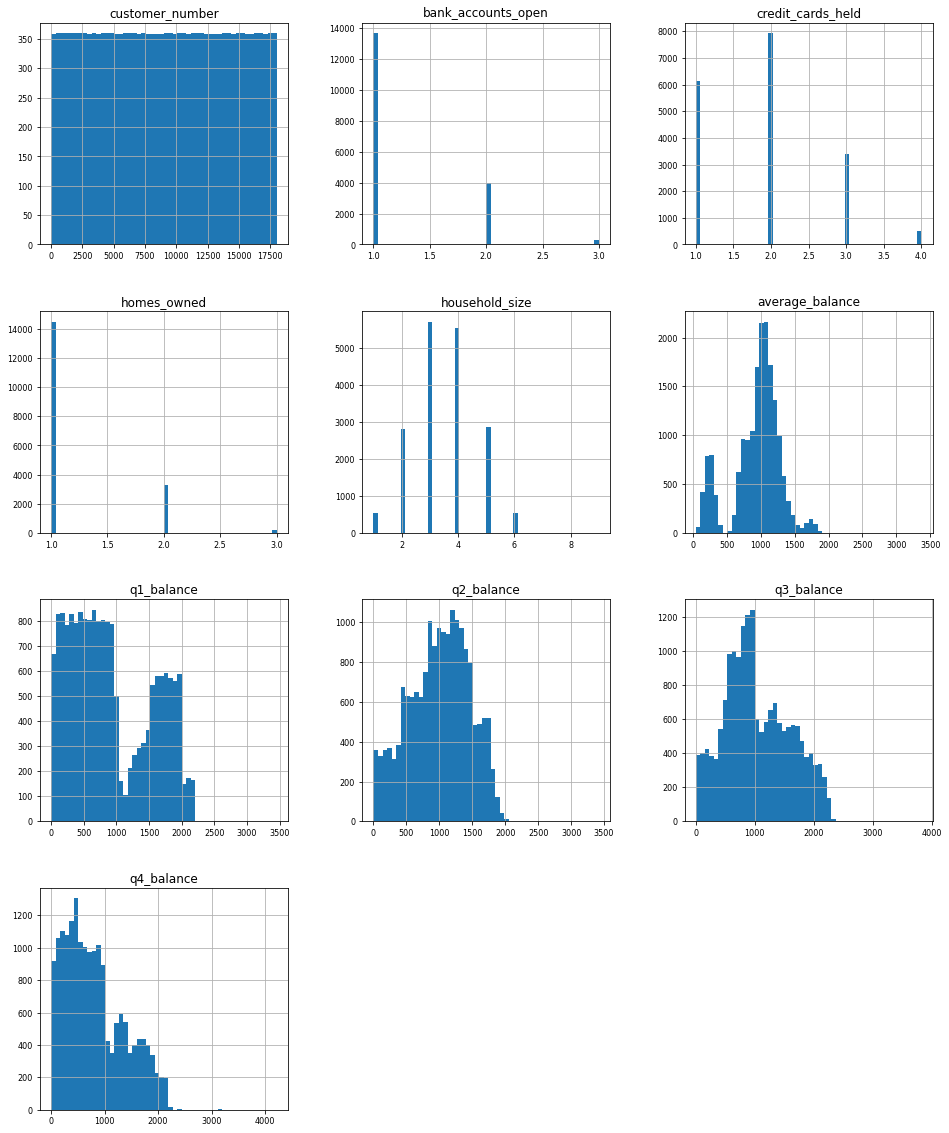

In [17]:
numericals.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [18]:
#check categoricals

categoricals = data_frame.select_dtypes(np.object)
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,homeowner
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No


#### Exploring and checking for outliers

In [19]:
new_data_frame = data_frame.filter(['credit_cards_held','household_size','average_balance'], axis=1)

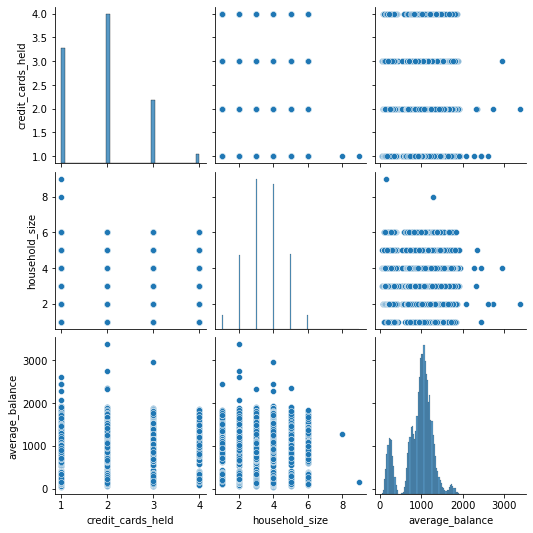

In [20]:
sns.pairplot(new_data_frame)

<AxesSubplot:xlabel='average_balance', ylabel='Count'>

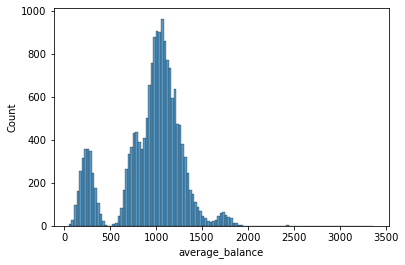

In [21]:
sns.histplot(data_frame['average_balance'])

<AxesSubplot:xlabel='average_balance', ylabel='Density'>

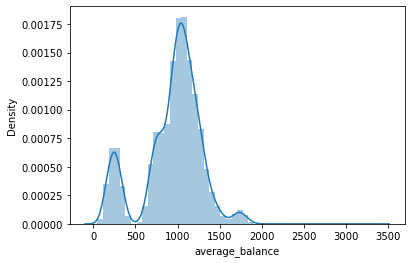

In [22]:
sns.distplot(data_frame['average_balance'])

[(-0.5, 10.0)]

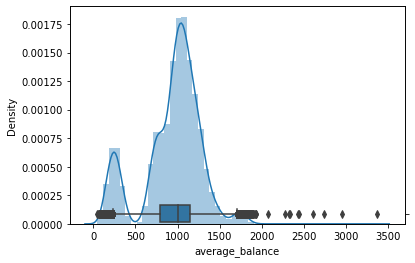

In [23]:
ax = sns.distplot(data_frame['average_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data_frame['average_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

<AxesSubplot:xlabel='average_balance'>

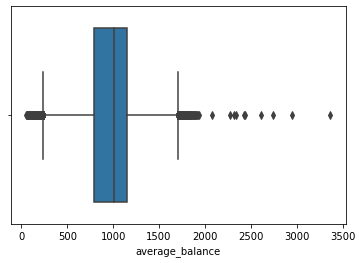

In [24]:
sns.boxplot(x=data_frame['average_balance'])

<AxesSubplot:xlabel='q1_balance'>

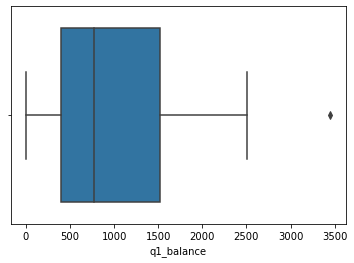

In [25]:
sns.boxplot(x=data_frame['q1_balance'])

[(-0.5, 10.0)]

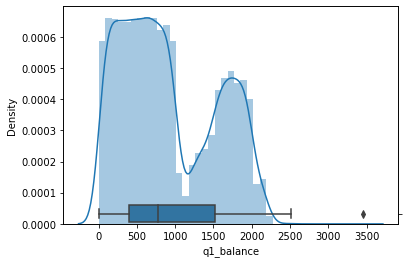

In [26]:
ax = sns.distplot(data_frame['q1_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data_frame['q1_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

<AxesSubplot:xlabel='q2_balance'>

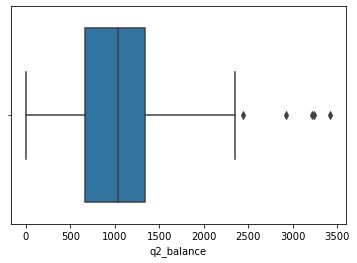

In [27]:
sns.boxplot(x=data_frame['q2_balance'])

[(-0.5, 10.0)]

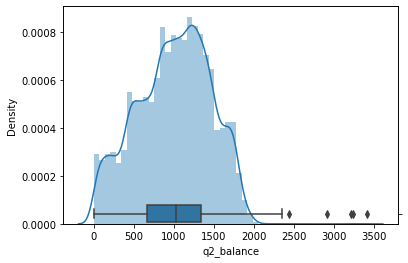

In [28]:
ax = sns.distplot(data_frame['q2_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data_frame['q2_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

<AxesSubplot:xlabel='q3_balance'>

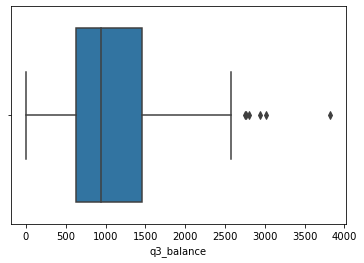

In [29]:
sns.boxplot(x=data_frame['q3_balance'])

[(-0.5, 10.0)]

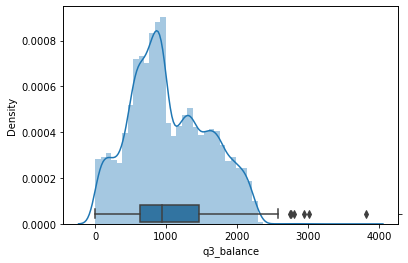

In [30]:
ax = sns.distplot(data_frame['q3_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data_frame['q3_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

<AxesSubplot:xlabel='q4_balance'>

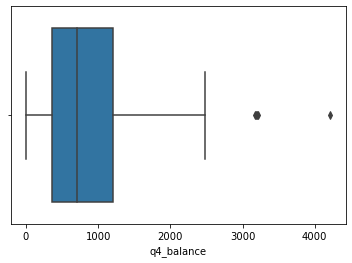

In [31]:
sns.boxplot(x=data_frame['q4_balance'])

[(-0.5, 10.0)]

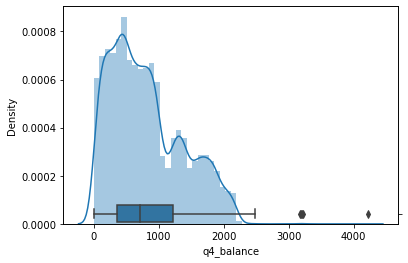

In [32]:
ax = sns.distplot(data_frame['q4_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data_frame['q4_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

## 3.2 Data Cleaning
#### Removing outliers

In [33]:
# Find the interquartile range for average_balance column.  Anything outside the IQR we will consider to be an outlier.
iqr = np.percentile(data_frame['average_balance'],75) - np.percentile(data_frame['average_balance'],25)
upper_limit = np.percentile(data_frame['average_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data_frame[data_frame['average_balance'] > upper_limit].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers))

The upper wisker is at: 1701.56
The number of points outside the upper wisker is:  278


In [34]:
data_frame['average_balance'].shape

(17975,)

In [35]:
data_frame = list(filter(lambda x: x < upper_limit, data_frame['average_balance']))
len(data_frame)

17697

In [ ]:
iqr = np.percentile(data_frame['q1_balance'],75) - np.percentile(data_frame['q1_balance'],25)
upper_limit = np.percentile(data_frame['q1_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data_frame[data_frame['q1_balance'] > upper_limit].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers))

In [ ]:
data_frame = list(filter(lambda x: x < upper_limit, data_frame['q1_balance']))
len(data_frame)

In [ ]:
for column in data_frame:
    unique_values = np.unique(data_frame[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print(f"The number of values for feature {column} is: {nr_values} -- {unique_values}")
    else:
        print(f"The number of values for feature {column} is: {nr_values}")

In [ ]:
def find_outliers(df):
    for column in df:
        iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
        upper_limit = np.percentile(df[column],75) + 1.5*iqr
        print("The upper wisker is at: %4.2f" % upper_limit)
        outliers = df[data_frame[column] > upper_limit].index.tolist()
        print("The number of points outside the upper wisker is: ",len(outliers))
        df = list(filter(lambda x: x < upper_limit, df[column]))   

In [ ]:
find_outliers(data_frame)

In [ ]:
#Investigate imbalances in data
sns.countplot(x="offer_accepted", data=data_frame)

In [ ]:
data_frame['offer_accepted'].value_counts()

In [49]:
#check for multicolinearity
numerical_data = data_frame['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

data_corr = data_frame[['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

TypeError: list indices must be integers or slices, not list

In [51]:
numerical_data = data_frame['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

TypeError: list indices must be integers or slices, not tuple

In [50]:
sns.heatmap(.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


TypeError: list indices must be integers or slices, not list

In [52]:
data_frame.head()

AttributeError: 'list' object has no attribute 'head'